In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [85]:
def plot_sim(n,p,k,tau):
    sd_z_seq = np.array([30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
    lasso_sd_err = np.zeros(len(sd_z_seq))
    ridge_sd_err = np.zeros(len(sd_z_seq))
    enet_sd_err = np.zeros(len(sd_z_seq))
    renet_sd_err = np.zeros(len(sd_z_seq))
    lasso_sd_std = np.zeros(len(sd_z_seq))
    ridge_sd_std = np.zeros(len(sd_z_seq))
    enet_sd_std = np.zeros(len(sd_z_seq))
    renet_sd_std = np.zeros(len(sd_z_seq))
    # Comment out the following lines if running simulations without best subset selection
    bss_sd_err = np.zeros(len(sd_z_seq))
    bss_sd_std = np.zeros(len(sd_z_seq))
    #End comment
    for sd_i in range(18):
        sd_z = sd_z_seq[sd_i]
        save_file_name = "err.avg.n." + str(n) + ".p." + str(p) + ".k." + str(k)  + ".tau." + str(tau) + ".sd." + str(sd_z)
        sd_file_name = "sd.avg.n." + str(n) + ".p." + str(p) + ".k." + str(k)  + ".tau." + str(tau) + ".sd." + str(sd_z)
        lasso_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"lasso."+ save_file_name+ ".csv", header=None)
        lasso_err_avg = lasso_df.values.flatten()
        lasso_sd_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"lasso."+ sd_file_name+ ".csv", header=None)
        lasso_sd = lasso_sd_df.values.flatten()
        ridge_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"ridge."+ save_file_name+ ".csv", header=None)
        ridge_err_avg = ridge_df.values.flatten()
        ridge_sd_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"ridge."+ sd_file_name+ ".csv", header=None)
        ridge_sd = ridge_sd_df.values.flatten()
        enet_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"enet."+ save_file_name+ ".csv", header=None)
        enet_err_avg = enet_df.values.flatten()
        enet_sd_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"enet."+ sd_file_name+ ".csv", header=None)
        enet_sd = enet_sd_df.values.flatten()
        enet1_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"enet1."+ save_file_name+ ".csv", header=None)
        enet1_err_avg = enet1_df.values.flatten()
        enet1_sd_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"enet1."+ sd_file_name+ ".csv", header=None)
        enet1_sd = enet1_sd_df.values.flatten()
        # Comment out the following lines if running simulations without best subset selection
        bss_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"bss."+ save_file_name+ ".csv", header=None)
        bss_err_avg = bss_df.values.flatten()
        bss_sd_df = pd.read_csv("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+"/" +"bss."+ sd_file_name+ ".csv", header=None)
        bss_err_avg = bss_df.values.flatten()
        #End comment
        lasso_sd_err[sd_i] = np.min(lasso_err_avg)
        lasso_sd_err[sd_i] = min(1, lasso_sd_err[sd_i])
        lasso_sd_err_idx = np.argmin(lasso_err_avg)
        lasso_sd_std[sd_i] = lasso_sd[lasso_sd_err_idx]
        if lasso_sd_err[sd_i] >= 1:
            lasso_sd_std[sd_i] = 0
        
        
        ridge_sd_err[sd_i] = np.min(ridge_err_avg)
        ridge_sd_err_idx = np.argmin(ridge_err_avg)
        ridge_sd_std[sd_i] = ridge_sd[ridge_sd_err_idx]
        
        renet_sd_err[sd_i] = np.min(renet_err_avg)
        renet_sd_err_idx = np.argmin(renet_err_avg)
        renet_sd_std[sd_i] = renet_sd[renet_sd_err_idx]
        
        # Comment out the following lines if running simulations without best subset selection
        bss_sd_err[sd_i] = min(bss_err_avg)
        bss_sd_err[sd_i] = min(1, bss_sd_err[sd_i])
        bss_sd_err_idx = np.argmin(bss_err_avg)
        bss_sd_std[sd_i] = bss_sd[bss_sd_err_idx]
        if bss_sd_err[sd_i] >= 1:
            bss_sd_std[sd_i] = 0
        #End comment
        enet_sd_err[sd_i] = np.min(np.concatenate((enet_err_avg, enet1_err_avg)))
        enet_sd_err_idx = np.argmin(np.concatenate((enet_err_avg, enet1_err_avg)))
        if enet_sd_err_idx < 10000:
            enet_sd_std[sd_i] = enet_sd[enet_sd_err_idx]
        else:
            enet_sd_std[sd_i] = enet1_sd[enet_sd_err_idx-9999]
        
    
    lasso_sd_std /= np.sqrt(n)
    ridge_sd_std /= np.sqrt(n)
    renet_sd_std /= np.sqrt(n)
    enet_sd_std /= np.sqrt(n)
    bss_sd_std /= np.sqrt(n)
        
    snr = sd_z_seq / tau  
    # Plotting multiple lines
    plt.errorbar(snr, lasso_sd_err, yerr=lasso_sd_std, label='lasso', color='blue', capsize=1.5)
    plt.errorbar(snr, ridge_sd_err, yerr=ridge_sd_std, label='ridge', color='red', capsize=1.5)
    plt.errorbar(snr, enet_sd_err, yerr=enet_sd_std, label='enet', color='green', capsize=1.5)
    plt.errorbar(snr, bss_sd_err, yerr=bss_sd_std, label='BSS', color='purple', capsize=1.5)

   
    # Adding title and labels
    plt.title(rf'$n={n}, \, p={p}, \, k={k}$')
    plt.xlabel('1/SNR')
    plt.ylabel('MSE')
    

    # Adding legend to differentiate the lines
    plt.legend()
    plt.savefig("n"+str(n)+"p"+str(p)+"k"+str(k)+"tau"+str(tau)+".pdf", format='pdf', bbox_inches='tight')
    # Display the plot
    plt.show()


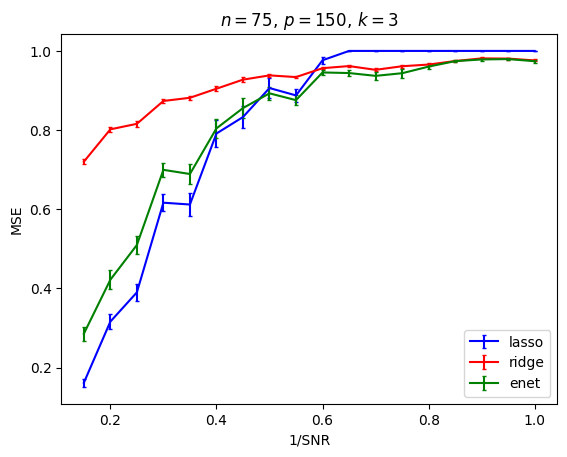

In [86]:
plot_sim(75,150,3,200)